In [8]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_number

pd.set_option('display.max_columns', None)

In [9]:
""" 
Read in the COPD hospitalization dataset - dataset gives us number of hospitalizations by MN county each year.
Querying and metadata can be found at: https://ephtracking.cdc.gov/DataExplorer/
Data source: Centers for Disease Control and Prevention, National Environmental Public Health Tracking Network.
"""
copd_df = pd.read_csv('copd2.csv')
copd_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'copd2.csv'

In [ ]:
# We don't need the State Fips code - we're only looking at Minnesota, and the comment column is not applicable
copd_df = copd_df.drop(columns=['StateFIPS', 'Data Comment']) 

In [ ]:
copd_df.head()

,State,CountyFIPS,County,Year,Value
0,Minnesota,27001,Aitkin,2006,51
1,Minnesota,27001,Aitkin,2007,53
2,Minnesota,27001,Aitkin,2008,52
3,Minnesota,27001,Aitkin,2009,53
4,Minnesota,27001,Aitkin,2010,60


In [ ]:
# Check data types and validate we don't need to convert any
copd_df.dtypes

State         object
CountyFIPS     int64
County        object
Year           int64
Value         object
dtype: object

In [ ]:

"""
Create a new feature to indicate whether data was "Suppressed" or missing: CDC Tracking Network suppresses data for 
counties with non-zero counts less than 6 and population less than 100,000 to protect confidentiality.
Other missing data (i.e.) values are "0", indicate one of the following:
    (1) data were not collected
    (2) data were collected but were not provided to CDC
    (3) data were incomplete or did not meet data quality standards
"""
copd_df['copd_data_desc'] = ''

# Before creating the feature, make sure the commas in numerical values (i.e. 1,070) are removed
copd_df['Value'] = copd_df['Value'].str.replace(',', '')

for index, row in copd_df.iterrows():
    if row['Value'] == '0':
        copd_df['copd_data_desc'][index] = 'Missing Data'
    if row['Value'].isdigit():
        copd_df['copd_data_desc'][index] = 'Confirmed Data'
    else:
        copd_df['copd_data_desc'][index] = 'Suppressed Data'

C:\Users\egreen1\AppData\Local\Temp\ipykernel_17652\2666176689.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copd_df['copd_data_desc'][index] = 'Confirmed Data'
C:\Users\egreen1\AppData\Local\Temp\ipykernel_17652\2666176689.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copd_df['copd_data_desc'][index] = 'Suppressed Data'
C:\Users\egreen1\AppData\Local\Temp\ipykernel_17652\2666176689.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [ ]:
# Update data types per their intended data type
copd_df['Value'] = copd_df['Value'].replace('Suppressed', np.nan)
copd_df['Value'] = copd_df['Value'].replace('0', np.nan)
copd_df['Value'] = copd_df['Value'].astype('Int64')

In [ ]:
copd_df.tail(50)

,State,CountyFIPS,County,Year,Value,copd_data_desc
994,Minnesota,27165,Watonwan,2016,11,Confirmed Data
995,Minnesota,27165,Watonwan,2017,<NA>,Suppressed Data
996,Minnesota,27167,Wilkin,2006,13,Confirmed Data
997,Minnesota,27167,Wilkin,2007,6,Confirmed Data
998,Minnesota,27167,Wilkin,2008,12,Confirmed Data
999,Minnesota,27167,Wilkin,2009,10,Confirmed Data
1000,Minnesota,27167,Wilkin,2010,13,Confirmed Data
1001,Minnesota,27167,Wilkin,2011,16,Confirmed Data
1002,Minnesota,27167,Wilkin,2012,9,Confirmed Data
1003,Minnesota,27167,Wilkin,2013,8,Confirmed Data


In [ ]:
copd_df.dtypes

State             object
CountyFIPS         int64
County            object
Year               int64
Value              Int64
copd_data_desc    object
dtype: object

In [ ]:
"""
Read in the air quality dataset - dataset gives us information about average air quality by MN county each year
Querying and metadata can be found at: https://data.web.health.state.mn.us/air_metadata
Data Source: Minnesota Department of Health, Minnesota Public Health Data Access
"""
air_df = pd.read_csv('air_quality2.csv')

In [ ]:
air_df

,county,fips,year,ozonePersonDayMon,ozoneDayStdMon,ozoneDayStdMod,ozoneAvgMod,ozoneModelFlag,pm25AvgMon,pm25PersonDayMon,pm25PctMon,pm25AvgMod,pm25ModelFlag,hasMonitor,hasOzoneMonitor,hasPm25Monitor
0,Aitkin,27001.0,2001.0,No data available,No data available,1.0,No data available,1.0,No data available,No data available,No data available,9.0,1.0,n,n,n
1,Aitkin,27001.0,2002.0,No data available,No data available,2.0,No data available,1.0,No data available,No data available,No data available,8.1,1.0,n,n,n
2,Aitkin,27001.0,2003.0,No data available,No data available,2.0,No data available,1.0,No data available,No data available,No data available,8.4,1.0,n,n,n
3,Aitkin,27001.0,2004.0,No data available,No data available,0.0,No data available,1.0,No data available,No data available,No data available,8.1,1.0,n,n,n
4,Aitkin,27001.0,2005.0,No data available,No data available,3.0,No data available,1.0,No data available,No data available,No data available,8.6,1.0,n,n,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,"St. Paul, MN 55164-0882",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,Phone: (651) 201-5900 or toll free: 1-800-205-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1499,Fax: (651) 201-5926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1500,E-mail: tracking.health@state.mn.us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# We notice there is some extra text information at the bottom of the file that does not fit the table - drop these rows
air_df.dropna(subset=['fips'], inplace=True)

# For any values with "No data available," we replace with NaN
air_df = air_df.replace('No data available', np.nan)

In [ ]:
"""
The primary column to focus on would be "pm25AvgMod", which is the modeled annual average concentration (24-hr average)
We will retain all columns in our air_df for now as they may come in handy for future analysis or feature engineering
Many of the "No data available" values are due to counties not having air quality monitors (PM 2.5 or Ozone) - because of this,
we will use Minnesota's modeled data, which uses the real monitor data and inflates it to generate values for neighboring
counties. This statistical method of Hierarchical Bayesian modeling is used nation wide by the CDC by combining data from
the Air Quality System Database with the EPA's Community Multiscale Air Quality model.
"""
air_df.head()

,county,fips,year,ozonePersonDayMon,ozoneDayStdMon,ozoneDayStdMod,ozoneAvgMod,ozoneModelFlag,pm25AvgMon,pm25PersonDayMon,pm25PctMon,pm25AvgMod,pm25ModelFlag,hasMonitor,hasOzoneMonitor,hasPm25Monitor
0,Aitkin,27001.0,2001.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,9.0,1.0,n,n,n
1,Aitkin,27001.0,2002.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,8.1,1.0,n,n,n
2,Aitkin,27001.0,2003.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,8.4,1.0,n,n,n
3,Aitkin,27001.0,2004.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,8.1,1.0,n,n,n
4,Aitkin,27001.0,2005.0,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,8.6,1.0,n,n,n


In [ ]:
# Check data types and validate we don't need to convert any
air_df.dtypes

county                object
fips                 float64
year                 float64
ozonePersonDayMon     object
ozoneDayStdMon        object
ozoneDayStdMod       float64
ozoneAvgMod           object
ozoneModelFlag       float64
pm25AvgMon            object
pm25PersonDayMon      object
pm25PctMon            object
pm25AvgMod           float64
pm25ModelFlag        float64
hasMonitor            object
hasOzoneMonitor       object
hasPm25Monitor        object
dtype: object

In [ ]:
# Data types need to be updated to fit their intended format - int64 (non-nullable), Int64 (nullable), or float64
air_df['fips'] = air_df['fips'].astype('int64')
air_df['year'] = air_df['year'].astype('int64')
air_df['ozonePersonDayMon'] = air_df['ozonePersonDayMon'].astype('Int64')
air_df['ozoneDayStdMon'] = air_df['ozoneDayStdMon'].astype('Int64')
air_df['ozoneDayStdMod'] = air_df['ozoneDayStdMod'].astype('Int64')
air_df['ozoneAvgMod'] = air_df['ozoneAvgMod'].astype('float64')
air_df['ozoneModelFlag'] = air_df['ozoneModelFlag'].astype('Int64')
air_df['pm25AvgMon'] = air_df['pm25AvgMon'].astype('float64')
air_df['pm25PersonDayMon'] = air_df['pm25PersonDayMon'].astype('float64')
air_df['pm25PctMon'] = air_df['pm25PctMon'].astype('float64')
air_df['pm25AvgMod'] = air_df['pm25AvgMod'].astype('float64')
air_df['pm25ModelFlag'] = air_df['pm25ModelFlag'].astype('Int64')

# Also rename the "fips" column to "CountyFIPS" to match the COPD dataset's column name
air_df = air_df.rename(columns={'fips': 'CountyFIPS'})

# Also rename the "year" column to "Year" to match the COPD dataset's column name
air_df = air_df.rename(columns={'year': 'Year'})

In [ ]:
air_df.dtypes

county                object
CountyFIPS             int64
Year                   int64
ozonePersonDayMon      Int64
ozoneDayStdMon         Int64
ozoneDayStdMod         Int64
ozoneAvgMod          float64
ozoneModelFlag         Int64
pm25AvgMon           float64
pm25PersonDayMon     float64
pm25PctMon           float64
pm25AvgMod           float64
pm25ModelFlag          Int64
hasMonitor            object
hasOzoneMonitor       object
hasPm25Monitor        object
dtype: object

In [ ]:
"""
Create a feature for air quality index category to indicate whether the modeled annual average concentration of PM 2.5 is good,
moderate, or unhealthy based on the PM 2.5 value. Breakpoint ranges are based on the National Ambient Air Quality Standards
for Particle Pollution from the U.S. Environmental Protection Agency: 
    https://www.epa.gov/sites/default/files/2016-04/documents/2012_aqi_factsheet.pdf
"""
air_df['air_quality_category'] = ''

for index, row in air_df.iterrows():
    if row['pm25AvgMod'] <= 12.0:
        air_df['air_quality_category'][index] = 'Good'
    elif row['pm25AvgMod'] >= 12.1 and row['pm25AvgMod'] <= 35.4:
        air_df['air_quality_category'][index] = 'Moderate'
    elif row['pm25AvgMod'] >= 35.5 and row['pm25AvgMod'] <= 55.4:
        air_df['air_quality_category'][index] = 'Unhealthy for Sensitive Groups'
    else:
        air_df['air_quality_category'][index] = 'Unhealthy to Hazardous'

C:\Users\egreen1\AppData\Local\Temp\ipykernel_17652\1098040719.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['air_quality_category'][index] = 'Good'
C:\Users\egreen1\AppData\Local\Temp\ipykernel_17652\1098040719.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['air_quality_category'][index] = 'Moderate'


In [ ]:
air_df.head()

,county,CountyFIPS,Year,ozonePersonDayMon,ozoneDayStdMon,ozoneDayStdMod,ozoneAvgMod,ozoneModelFlag,pm25AvgMon,pm25PersonDayMon,pm25PctMon,pm25AvgMod,pm25ModelFlag,hasMonitor,hasOzoneMonitor,hasPm25Monitor,air_quality_category
0,Aitkin,27001,2001,<NA>,<NA>,1,NaN,1,NaN,NaN,NaN,9.0,1,n,n,n,Good
1,Aitkin,27001,2002,<NA>,<NA>,2,NaN,1,NaN,NaN,NaN,8.1,1,n,n,n,Good
2,Aitkin,27001,2003,<NA>,<NA>,2,NaN,1,NaN,NaN,NaN,8.4,1,n,n,n,Good
3,Aitkin,27001,2004,<NA>,<NA>,0,NaN,1,NaN,NaN,NaN,8.1,1,n,n,n,Good
4,Aitkin,27001,2005,<NA>,<NA>,3,NaN,1,NaN,NaN,NaN,8.6,1,n,n,n,Good


In [ ]:
"""
Merge the COPD hospitalization dataset and air quality datasets together.
For our final dataset, we are only including "pm25AvgMod", which is the modeled annual average concentration of PM 2.5, air 
pollutant particles. PM 2.5 is one of the major causes of poor air quality, with levels reaching 12 µg/m^3 considered to 
be moderately unhealthy if exposed to for extended periods of time. This will give us the most robust and complete dataset
based on the Minnesota Department of Health, EPA, and CDC monitoring and modeling.
"""
copd_air_df = pd.merge(copd_df, air_df[['CountyFIPS', 'Year', 'pm25AvgMod', 'air_quality_category']], 
                       on=['CountyFIPS', 'Year'], how='inner')

In [ ]:
copd_air_df

,State,CountyFIPS,County,Year,Value,copd_data_desc,pm25AvgMod,air_quality_category
0,Minnesota,27001,Aitkin,2006,51,Confirmed Data,8.10,Good
1,Minnesota,27001,Aitkin,2007,53,Confirmed Data,8.30,Good
2,Minnesota,27001,Aitkin,2008,52,Confirmed Data,8.30,Good
3,Minnesota,27001,Aitkin,2009,53,Confirmed Data,8.20,Good
4,Minnesota,27001,Aitkin,2010,60,Confirmed Data,7.70,Good
...,...,...,...,...,...,...,...,...
1039,Minnesota,27173,Yellow Medicine,2013,31,Confirmed Data,8.00,Good
1040,Minnesota,27173,Yellow Medicine,2014,34,Confirmed Data,6.19,Good
1041,Minnesota,27173,Yellow Medicine,2015,37,Confirmed Data,8.87,Good
1042,Minnesota,27173,Yellow Medicine,2016,20,Confirmed Data,6.10,Good


In [ ]:
"""
Read in shapefile of Minnesota county boundaries
Source: Minnesota Geospatial Commons, Natural Resources Department
Metadata can be found here: 
    https://resources.gisdata.mn.gov/pub/gdrs/data/pub/us_mn_state_dnr/bdry_counties_in_minnesota/metadata/metadata.html
"""
county_df = gpd.read_file('shp_bdry_counties_in_minnesota/mn_county_boundaries.shp')
county_df.head()

,AREA,PERIMETER,CTYONLY_,CTYONLY_ID,COUN,CTY_NAME,CTY_ABBR,CTY_FIPS,Shape_Leng,Shape_Area,geometry
0,4.608321e+09,388250.145723,2.0,1.0,39,Lake of the Woods,LOTW,77,388250.145362,4.608321e+09,"POLYGON ((330081.663 5429937.085, 330973.855 5..."
1,2.862184e+09,263017.482774,3.0,2.0,35,Kittson,KITT,69,263017.482649,2.862184e+09,"POLYGON ((250934.678 5433053.183, 250908.729 5..."
2,4.347099e+09,302590.752930,4.0,3.0,68,Roseau,ROSE,135,302590.752705,4.347099e+09,"POLYGON ((250934.678 5433053.183, 251190.642 5..."
3,8.167238e+09,412897.435943,5.0,4.0,36,Koochiching,KOOC,71,412897.435786,8.167238e+09,"POLYGON ((394785.782 5395220.852, 395221.272 5..."
4,4.698732e+09,374207.651291,6.0,5.0,45,Marshall,MARS,89,374207.651278,4.698732e+09,"POLYGON ((249941.883 5382327.086, 251522.947 5..."


In [ ]:
county_df.dtypes

AREA           float64
PERIMETER      float64
CTYONLY_       float64
CTYONLY_ID     float64
COUN             int64
CTY_NAME        object
CTY_ABBR        object
CTY_FIPS         int64
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [ ]:
"""AREA and Shape_Area are redundant, as are PERIMETER and Shape_Leng. Drop one of both, as well as the surrogate keys and
other unnecessary columns.
"""
county_df = county_df.drop(columns=['CTYONLY_', 'CTYONLY_ID', 'COUN', 'CTY_ABBR', 'Shape_Leng', 'Shape_Area'])

In [ ]:
"""
We can see above that the county FIPS codes do not include the Minnesota code at the front ("27"). We need to left pad
the values so that something like "77" becomes "27077" and matches the format of the other dataset FIPS codes.
"""
for index, row in county_df.iterrows():
    if len(str(row['CTY_FIPS'])) == 1:
        county_df['CTY_FIPS'][index] = '2700' + str(county_df['CTY_FIPS'][index])    
    elif len(str(row['CTY_FIPS'])) == 2:
        county_df['CTY_FIPS'][index] = '270' + str(county_df['CTY_FIPS'][index])
    elif len(str(row['CTY_FIPS'])) == 3:
        county_df['CTY_FIPS'][index] = '27' + str(county_df['CTY_FIPS'][index])
county_df['CTY_FIPS'] = county_df['CTY_FIPS'].astype('int64')
county_df.head()

C:\Users\egreen1\AppData\Local\Temp\ipykernel_17652\3356945035.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['CTY_FIPS'][index] = '270' + str(county_df['CTY_FIPS'][index])


,AREA,PERIMETER,CTY_NAME,CTY_FIPS,geometry
0,4.608321e+09,388250.145723,Lake of the Woods,27077,"POLYGON ((330081.663 5429937.085, 330973.855 5..."
1,2.862184e+09,263017.482774,Kittson,27069,"POLYGON ((250934.678 5433053.183, 250908.729 5..."
2,4.347099e+09,302590.752930,Roseau,27135,"POLYGON ((250934.678 5433053.183, 251190.642 5..."
3,8.167238e+09,412897.435943,Koochiching,27071,"POLYGON ((394785.782 5395220.852, 395221.272 5..."
4,4.698732e+09,374207.651291,Marshall,27089,"POLYGON ((249941.883 5382327.086, 251522.947 5..."


<Axes: >

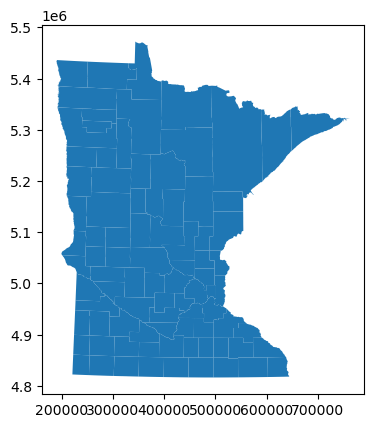

In [ ]:
county_df.plot()

In [ ]:
type(county_df)

geopandas.geodataframe.GeoDataFrame

In [ ]:
county_df.dtypes

AREA          float64
PERIMETER     float64
CTY_NAME       object
CTY_FIPS        int64
geometry     geometry
dtype: object

In [ ]:
# Also rename the "CTY_FIPS" column to "CountyFIPS" to match the COPD dataset's column name
county_df = county_df.rename(columns={'CTY_FIPS': 'CountyFIPS'})
county_df['CountyFIPS'].astype('int64')

0      27077
1      27069
2      27135
3      27071
4      27089
       ...  
112    27031
113    27031
114    27031
115    27075
116    27075
Name: CountyFIPS, Length: 117, dtype: int64

In [ ]:
county_df.sort_values(by=['CountyFIPS'])

,AREA,PERIMETER,CTY_NAME,CountyFIPS,geometry
20,5.162997e+09,309913.602796,Aitkin,27001,"POLYGON ((441092.102 5208823.740, 441972.033 5..."
45,1.153668e+09,154027.000771,Anoka,27003,"POLYGON ((498466.887 5028687.621, 498506.879 5..."
19,3.743638e+09,253749.787038,Becker,27005,"POLYGON ((257821.955 5226916.200, 259420.981 5..."
6,7.911450e+09,429419.170499,Beltrami,27007,"POLYGON ((327092.049 5378987.887, 327188.051 5..."
34,1.069263e+09,146833.774740,Benton,27009,"POLYGON ((401135.649 5069817.591, 401100.930 5..."
...,...,...,...,...,...
77,1.138197e+09,136541.128127,Watonwan,27165,"POLYGON ((390457.690 4884853.382, 390424.711 4..."
25,1.947313e+09,271418.992614,Wilkin,27167,"POLYGON ((210306.556 5171039.391, 210518.305 5..."
72,1.660523e+09,184798.793688,Winona,27169,"POLYGON ((573694.833 4884143.189, 573676.805 4..."
44,1.850178e+09,217797.569313,Wright,27171,"POLYGON ((418128.830 5030374.095, 418140.724 5..."


In [ ]:
# Create a feature to find the center of each Minnesota county
county_df['county_centroid'] = county_df.centroid

In [ ]:
county_df.head()

,AREA,PERIMETER,CTY_NAME,CountyFIPS,geometry,county_centroid
0,4.608321e+09,388250.145723,Lake of the Woods,27077,"POLYGON ((330081.663 5429937.085, 330973.855 5...",POINT (360107.714 5403638.729)
1,2.862184e+09,263017.482774,Kittson,27069,"POLYGON ((250934.678 5433053.183, 250908.729 5...",POINT (222121.515 5409521.139)
2,4.347099e+09,302590.752930,Roseau,27135,"POLYGON ((250934.678 5433053.183, 251190.642 5...",POINT (293494.047 5406293.746)
3,8.167238e+09,412897.435943,Koochiching,27071,"POLYGON ((394785.782 5395220.852, 395221.272 5...",POINT (441842.515 5343851.334)
4,4.698732e+09,374207.651291,Marshall,27089,"POLYGON ((249941.883 5382327.086, 251522.947 5...",POINT (250473.641 5361662.412)


In [ ]:
"""
Now we can merge the county dataset to our combined COPD and air quality dataset
We'll do an outer join to ensure that each record from both the COPD/air quality dataset and county geospatial dataset are
included in the joined DataFrame
"""
copd_air_cty_df = pd.merge(copd_air_df, county_df[['AREA', 'PERIMETER', 'CountyFIPS', 'geometry',
                                                  'county_centroid']], on=['CountyFIPS'], how='outer')

In [ ]:
copd_air_cty_df.head()

,State,CountyFIPS,County,Year,Value,copd_data_desc,pm25AvgMod,air_quality_category,AREA,PERIMETER,geometry,county_centroid
0,Minnesota,27001,Aitkin,2006,51,Confirmed Data,8.1,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174)
1,Minnesota,27001,Aitkin,2007,53,Confirmed Data,8.3,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174)
2,Minnesota,27001,Aitkin,2008,52,Confirmed Data,8.3,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174)
3,Minnesota,27001,Aitkin,2009,53,Confirmed Data,8.2,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174)
4,Minnesota,27001,Aitkin,2010,60,Confirmed Data,7.7,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174)


In [ ]:
# Lastly, we'll load Minnesota population data
pop_df = pd.read_excel('mn_county_populations.xlsx')

In [ ]:
pop_df

,Geography Type,Geography Name,Year,Population,Households,Persons Per Household (PPH)
0,EDR,01 (Northwest),2022,85198,35073,2.371796
1,EDR,02 (Headwaters),2022,87975,34713,2.463717
2,EDR,03 (Arrowhead),2022,329598,140670,2.251703
3,EDR,04 (West Central),2022,241633,97706,2.403363
4,EDR,05 (North Central),2022,174159,71684,2.390045
...,...,...,...,...,...,...
3328,County,Watonwan,1990,11682,4530,2.578808
3329,County,Wilkin,1990,7516,2805,2.679501
3330,County,Winona,1990,47828,16930,2.825044
3331,County,Wright,1990,68710,23013,2.985704


In [ ]:
"""
Filter the dataset down to Geography Type "County" and years between 2006 and 2017 (based on the years we used for COPD
hospitalizations and air quality)
"""
pop_df = pop_df[pop_df['Geography Type'].isin(['County'])]
pop_df = pop_df[pop_df['Year'].isin([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])]

In [ ]:
pop_df

,Geography Type,Geography Name,Year,Population,Households,Persons Per Household (PPH)
519,County,Aitkin,2017,15821,7297,2.131561
520,County,Anoka,2017,352674,129391,2.698781
521,County,Becker,2017,34103,14097,2.385969
522,County,Beltrami,2017,46585,17912,2.483586
523,County,Benton,2017,40128,16012,2.439858
...,...,...,...,...,...,...
1712,County,Watonwan,2006,11480,4589,2.460000
1713,County,Wilkin,2006,6757,2721,2.420000
1714,County,Winona,2006,49903,19270,2.360000
1715,County,Wright,2006,114806,41923,2.710000


In [ ]:
# Rename the "Geography Name" column to "County"
pop_df = pop_df.rename(columns={'Geography Name': 'County'})

In [ ]:
# Double check data types
pop_df.dtypes

Geography Type                  object
County                          object
Year                             int64
Population                       int64
Households                       int64
Persons Per Household (PPH)    float64
dtype: object

In [ ]:
# Now we can merge the population info dataset to our combined dataset
combined_df = pd.merge(copd_air_cty_df, pop_df[['County', 'Year', 'Population', 'Households', 'Persons Per Household (PPH)']], 
                           on=['County', 'Year'], how='left')

In [ ]:
combined_df.sort_values(by=['CountyFIPS', 'Year']).head()

,State,CountyFIPS,County,Year,Value,copd_data_desc,pm25AvgMod,air_quality_category,AREA,PERIMETER,geometry,county_centroid,Population,Households,Persons Per Household (PPH)
0,Minnesota,27001,Aitkin,2006,51,Confirmed Data,8.1,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),16198,7215,2.21
1,Minnesota,27001,Aitkin,2007,53,Confirmed Data,8.3,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),16067,7203,2.20
2,Minnesota,27001,Aitkin,2008,52,Confirmed Data,8.3,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),16054,7235,2.19
3,Minnesota,27001,Aitkin,2009,53,Confirmed Data,8.2,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),15737,7111,2.18
4,Minnesota,27001,Aitkin,2010,60,Confirmed Data,7.7,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),16202,7299,2.18


In [ ]:
# Create a feature to calculate the percentage of the population hospitalized for COPD by year and county
combined_df['copd_hospitalization_pct'] = combined_df['Value'] / combined_df['Population']

In [ ]:
# Rename the AREA and PERIMETER columns to indicate they are measured in meters. Create features for area and perimeter in miles
combined_df = combined_df.rename(columns={'AREA': 'area_in_sq_meters', 'PERIMETER': 'perimeter_in_meters'})

combined_df['area_in_sq_miles'] = combined_df['area_in_sq_meters'] / 2.59e+6
combined_df['perimeter_in_miles'] = combined_df['perimeter_in_meters'] / 2.59e+6

In [ ]:
combined_df.head()

,State,CountyFIPS,County,Year,Value,copd_data_desc,pm25AvgMod,air_quality_category,area_in_sq_meters,perimeter_in_meters,geometry,county_centroid,Population,Households,Persons Per Household (PPH),copd_hospitalization_pct,area_in_sq_miles,perimeter_in_miles
0,Minnesota,27001,Aitkin,2006,51,Confirmed Data,8.1,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),16198,7215,2.21,0.003149,1993.435327,0.119658
1,Minnesota,27001,Aitkin,2007,53,Confirmed Data,8.3,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),16067,7203,2.20,0.003299,1993.435327,0.119658
2,Minnesota,27001,Aitkin,2008,52,Confirmed Data,8.3,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),16054,7235,2.19,0.003239,1993.435327,0.119658
3,Minnesota,27001,Aitkin,2009,53,Confirmed Data,8.2,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),15737,7111,2.18,0.003368,1993.435327,0.119658
4,Minnesota,27001,Aitkin,2010,60,Confirmed Data,7.7,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),16202,7299,2.18,0.003703,1993.435327,0.119658


In [ ]:
# Rename columns to better standardize
combined_df = combined_df.rename(columns={'State': 'state_name', 'CountyFIPS': 'county_fips_code', 'County': 'county_name',
                                         'Year': 'year', 'Value': 'copd_hospitalization_count', 
                                          'pm25AvgMod': 'pm2.5_annual_avg_concentration', 'Population': 'population',
                                         'Households': 'households_count', 
                                          'Persons Per Household (PPH)': 'persons_per_household'})

In [ ]:
# Add one more column that uses the population and county areas in square miles to calculate the density of people per mile
combined_df['persons_per_sq_mile'] = combined_df['population'] / combined_df['area_in_sq_miles']

In [ ]:
combined_df.head()

,state_name,county_fips_code,county_name,year,copd_hospitalization_count,copd_data_desc,pm2.5_annual_avg_concentration,air_quality_category,area_in_sq_meters,perimeter_in_meters,geometry,county_centroid,population,households_count,persons_per_household,copd_hospitalization_pct,area_in_sq_miles,perimeter_in_miles,persons_per_sq_mile
0,Minnesota,27001,Aitkin,2006,51,Confirmed Data,8.1,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),16198,7215,2.21,0.003149,1993.435327,0.119658,8.125671
1,Minnesota,27001,Aitkin,2007,53,Confirmed Data,8.3,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),16067,7203,2.20,0.003299,1993.435327,0.119658,8.059955
2,Minnesota,27001,Aitkin,2008,52,Confirmed Data,8.3,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),16054,7235,2.19,0.003239,1993.435327,0.119658,8.053434
3,Minnesota,27001,Aitkin,2009,53,Confirmed Data,8.2,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),15737,7111,2.18,0.003368,1993.435327,0.119658,7.894412
4,Minnesota,27001,Aitkin,2010,60,Confirmed Data,7.7,Good,5.162997e+09,309913.602796,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),16202,7299,2.18,0.003703,1993.435327,0.119658,8.127678


In [ ]:
# Rearrange columns for better readability
final_df = combined_df[['state_name', 'county_name', 'county_fips_code', 'year', 'area_in_sq_meters', 'area_in_sq_miles',
                        'perimeter_in_meters', 'perimeter_in_miles',
                        'geometry', 'county_centroid', 'population', 'persons_per_sq_mile', 'households_count', 
                        'persons_per_household', 'copd_hospitalization_count', 'copd_hospitalization_pct', 'copd_data_desc', 
                        'pm2.5_annual_avg_concentration', 'air_quality_category']]

In [ ]:
final_df.dtypes

state_name                          object
county_name                         object
county_fips_code                     int64
year                                 int64
area_in_sq_meters                  float64
area_in_sq_miles                   float64
perimeter_in_meters                float64
perimeter_in_miles                 float64
geometry                          geometry
county_centroid                   geometry
population                           int64
persons_per_sq_mile                float64
households_count                     int64
persons_per_household              float64
copd_hospitalization_count           Int64
copd_hospitalization_pct           Float64
copd_data_desc                      object
pm2.5_annual_avg_concentration     float64
air_quality_category                object
dtype: object

In [ ]:
final_df.head()

,state_name,county_name,county_fips_code,year,area_in_sq_meters,area_in_sq_miles,perimeter_in_meters,perimeter_in_miles,geometry,county_centroid,population,persons_per_sq_mile,households_count,persons_per_household,copd_hospitalization_count,copd_hospitalization_pct,copd_data_desc,pm2.5_annual_avg_concentration,air_quality_category
0,Minnesota,Aitkin,27001,2006,5.162997e+09,1993.435327,309913.602796,0.119658,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),16198,8.125671,7215,2.21,51,0.003149,Confirmed Data,8.1,Good
1,Minnesota,Aitkin,27001,2007,5.162997e+09,1993.435327,309913.602796,0.119658,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),16067,8.059955,7203,2.20,53,0.003299,Confirmed Data,8.3,Good
2,Minnesota,Aitkin,27001,2008,5.162997e+09,1993.435327,309913.602796,0.119658,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),16054,8.053434,7235,2.19,52,0.003239,Confirmed Data,8.3,Good
3,Minnesota,Aitkin,27001,2009,5.162997e+09,1993.435327,309913.602796,0.119658,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),15737,7.894412,7111,2.18,53,0.003368,Confirmed Data,8.2,Good
4,Minnesota,Aitkin,27001,2010,5.162997e+09,1993.435327,309913.602796,0.119658,"POLYGON ((441092.102 5208823.740, 441972.033 5...",POINT (468197.318 5161620.174),16202,8.127678,7299,2.18,60,0.003703,Confirmed Data,7.7,Good
